In [1]:
import tensorflow as tf
print("Versão do TensorFlow:", tf.__version__)

from tensorflow import keras
print("versão do Keras:", keras.__version__)

# IMPORTANDO COMANDOS E FUNÇÕES #

import numpy as np
import matplotlib.pyplot as plt #gerar gráfico
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

import pickle

# IMPORTANDO LAYERS PARA A CNN #

from keras.models import Sequential
from keras import layers
from keras.layers import Dropout

Versão do TensorFlow: 2.1.0
versão do Keras: 2.2.4-tf


Using TensorFlow backend.


In [2]:
import h5py

print("versao do h5py:", h5py.__version__)

versao do h5py: 2.10.0


In [3]:
# MONTANDO A ESTRUTURA DA CNN #

model = keras.models.load_model('model_proj_antigo_patience=15.h5')

In [4]:
model.summary() # resumo da estrutura, com os parâmetros ajustáveis

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)       

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(
                  from_logits=False,
                  label_smoothing=0,                            #configurações da função loss
                  reduction="auto",
                  name="categorical_crossentropy"),
              metrics=['accuracy'])

In [6]:
# DIVIDIR AS 8000 IMAGENS EM PARTIÇÃO DE TREINO E VALIDAÇÃO, UTILIZANDO O IMAGEDATAGENERATOR #

from keras.preprocessing.image import ImageDataGenerator

datagen =  ImageDataGenerator(rescale = 1./255, validation_split=0.2) # comando para reescala + divisão em 20% para validação

# imagens de treino (80%) 

train_data = datagen.flow_from_directory('dataset_smkt/Training', 
                                         subset = 'training',
                                         batch_size = 64,
                                         target_size = (100, 100)) # definindo tamanho das imagens

# imagens de validação (20%)

valid_data = datagen.flow_from_directory('dataset_smkt/Training',
                                         subset='validation',
                                         batch_size = 64,
                                         target_size = (100, 100))

Found 1281 images belonging to 11 classes.
Found 315 images belonging to 11 classes.


In [7]:
# DEFININDO O COMANDO EARLYSTOPPING #

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience = 10) #early stopping baseado na melhor acurácia de validação

In [8]:
# INÍCIO DO TREINO DO MODELO #

history = model.fit(train_data,
                    epochs=100,
                    validation_data=valid_data,
                    callbacks = [es])

# informação: steps_per_epoch = número de imagens / batch_size

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 21 steps, validate for 5 steps
Epoch 1/100
21/21 [==============================] - 50s 2s/step - loss: 9.5256 - accuracy: 0.1140 - val_loss: 2.2682 - val_accuracy: 0.2032
Epoch 2/100
21/21 [==============================] - 37s 2s/step - loss: 2.3153 - accuracy: 0.1608 - val_loss: 2.2746 - val_accuracy: 0.1302
Epoch 3/100
21/21 [==============================] - 32s 2s/step - loss: 2.1346 - accuracy: 0.2498 - val_loss: 2.0082 - val_accuracy: 0.3048
Epoch 4/100
21/21 [==============================] - 35s 2s/step - loss: 1.7681 - accuracy: 0.3357 - val_loss: 1.7975 - val_accuracy: 0.3651
Epoch 5/100
21/21 [==============================] - 37s 2s/step - loss: 1.5700 - accuracy: 0.4450 - val_loss: 1.6895 - val_accuracy: 0.4444
Epoch 6/100
21/21 [==============================] - 34s 2s/step - loss: 1.2619 - accuracy: 0.5574 - val_loss: 1.5951 - val_accuracy: 0.4889
Epoch 7/100
21/21 [==============================] - 33s 2s/ste

21/21 [==============================] - 35s 2s/step - loss: 0.1836 - accuracy: 0.9282 - val_loss: 0.5608 - val_accuracy: 0.8508
Epoch 58/100
21/21 [==============================] - 33s 2s/step - loss: 0.2268 - accuracy: 0.9321 - val_loss: 0.4016 - val_accuracy: 0.8794
Epoch 59/100
21/21 [==============================] - 36s 2s/step - loss: 0.1904 - accuracy: 0.9297 - val_loss: 0.8419 - val_accuracy: 0.7937
Epoch 60/100
21/21 [==============================] - 33s 2s/step - loss: 0.1880 - accuracy: 0.9313 - val_loss: 0.6704 - val_accuracy: 0.8444
Epoch 61/100
21/21 [==============================] - 33s 2s/step - loss: 0.1865 - accuracy: 0.9305 - val_loss: 0.5575 - val_accuracy: 0.8286
Epoch 62/100
21/21 [==============================] - 33s 2s/step - loss: 0.1714 - accuracy: 0.9375 - val_loss: 0.5404 - val_accuracy: 0.8476
Epoch 63/100
21/21 [==============================] - 33s 2s/step - loss: 0.1578 - accuracy: 0.9383 - val_loss: 0.7814 - val_accuracy: 0.7937
Epoch 64/100
21/21 

In [9]:
model.save('model_1est.h5',
          overwrite = True) 
del model

with open('trainHistoryDict_model_1est', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [10]:
model = keras.models.load_model('model_1est.h5')
history = pickle.load(open('trainHistoryDict_model_1est', "rb"))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)       

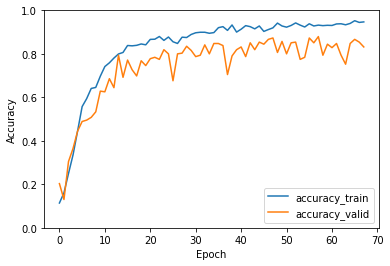

In [12]:
# GERANDO GRÁFICO COM RESULTADOS DAS ACURÁCIAS DE TREINO E VALIDAÇÃO #
plt.plot(history['accuracy'], label='accuracy_train')
plt.plot(history['val_accuracy'], label = 'accuracy_valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

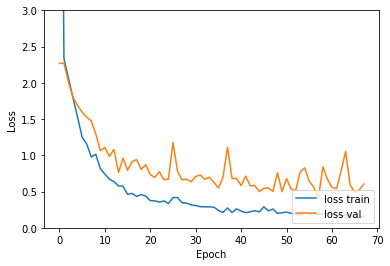

In [13]:
# GERANDO GRÁFICO COM RESULTADOS DO LOSS DE TREINO E VALIDAÇÃO #

plt.plot(history['loss'], label='loss train')
plt.plot(history['val_loss'], label='loss val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 3])
plt.legend(loc='lower right')

In [14]:
datagen_test =  ImageDataGenerator(rescale = 1./255) # comando para reescala das imagens de teste

# imagens de teste

test_data = datagen_test.flow_from_directory(directory='dataset_smkt/Test',
                                             target_size = (100, 100),
                                             batch_size = 1,
                                             shuffle=False)

Found 397 images belonging to 11 classes.


In [15]:
# DEFININDO COMANDO PARA AVALIAR O DESEMPENHO DO MODELO NAS IMAGENS DE TESTE #

test_loss, test_acc = model.evaluate(test_data) # verificar versão do Keras

print("acurácia nos dados de teste:", test_acc)
print("loss dos dados de teste:", test_loss)

  ...
    to  
  ['...']
397/397 [==============================] - 18s 44ms/step - loss: 1.0888 - accuracy: 0.7078
acurácia nos dados de teste: 0.70780855
loss dos dados de teste: 1.0887725388144813


In [16]:
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, accuracy_score

Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

print(y_pred.shape)

print(test_data.classes)

print('Accuracy')
print(accuracy_score(test_data.classes,y_pred))

print('Balanced Accuracy')
print(balanced_accuracy_score(test_data.classes,y_pred))

print('Confusion Matrix')
print(confusion_matrix(test_data.classes, y_pred))
print('Classification Report')

(397,)
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  